<a href="https://colab.research.google.com/github/timeseriesAI/tsai/blob/master/tutorial_nbs/00c_Time_Series_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

created by Ignacio Oguiza - email: timeseriesAI@gmail.com

## Import libraries 📚

Since some of you have been asking questions as to how to prepare your data to be able to use timeserisAI, I've prepared a short tutorial to address this.

There are endless options in terms of how your source data may be stored, so I'll cover a few of the most frequent ones I've seen. I may be expanding this in the future if needed.

In [1]:
# ## NOTE: UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI
# stable = False # True: latest version from github, False: stable version in pip
# if stable: 
#     !pip install -Uqq tsai
# else:      
#     !pip install -Uqq git+https://github.com/timeseriesAI/tsai.git

# ## NOTE: REMEMBER TO RESTART YOUR RUNTIME ONCE THE INSTALLATION IS FINISHED

In [1]:
from tsai.all import *
print('tsai       :', tsai.__version__)
print('fastai     :', fastai.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)

tsai       : 0.2.16
fastai     : 2.2.7
fastcore   : 1.3.19
torch      : 1.7.1


## Required input shape 🔶

To be able to use timeseriesAI your data needs to have 3 dimensions: 

* **number of samples**
* **number of features** (aka variables, dimensions, channels)
* **number of steps** (or length, time steps, sequence steps)

There are a few convenience functions that you may want to use to prepare your data. 

We are going to see how you could prepare your data in a few scenarios. 

**Note: I've recently modified timeseriesAI so that you can also use 2d input data in the case of univariate time series (they'll be converted to 3d internally), although you can still pass univariate time series as 3d or pass them if you prefer. You'll get the same result.**

## UCR time series data ⏳

The easiest case if if you want to use some of the data already preprocessed in timeseriesAI (all UCR datasets have been included). In this case, the only thing you need to do is:

* select a univariate or multivariate dataset from the list
* use the get_UCR_data function

In [298]:
print('univariate datasets: ', get_UCR_univariate_list())

univariate datasets:  ['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'In

In [299]:
print('multivariate datasets: ', get_UCR_multivariate_list())

multivariate datasets:  ['ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'ERing', 'EthanolConcentration', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery', 'NATOPS', 'PEMS-SF', 'PenDigits', 'PhonemeSpectra', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']


In [300]:
ds_name = 'NATOPS' 
X, y, splits = get_UCR_data(ds_name, return_split=False)
X.shape, y.shape, splits

((360, 24, 51),
 (360,),
 ((#180) [0,1,2,3,4,5,6,7,8,9...],
  (#180) [180,181,182,183,184,185,186,187,188,189...]))

In [301]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#360) [(TSTensor(vars:24, len:51), TensorCategory(3)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(3)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(4)),(TSTensor(vars:24, len:51), TensorCategory(0)),(TSTensor(vars:24, len:51), TensorCategory(5)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(1))...]

As you can see, X has 3 dimensions: 

* 360 samples
* 24 features
* 51 time steps

Let's visualize of the samples:

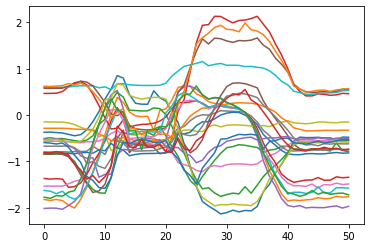

In [302]:
plt.plot(X[0].T);

## 2d or 3d np.ndarray/ torch.Tensor ⌗

Another option is that you have your data as an array or a tensor. 
In this case, the only thing you'll need to do is to transform your data to 3d (if not already done), and generate your splits.
We are going to simulate this scenario generating 2d data for a univariate dataset: 

In [303]:
ds_name = 'OliveOil' 
X, y, _ = get_UCR_data(ds_name, return_split=False)
X_2d = X[:, 0]
X_2d.shape, y.shape

((60, 570), (60,))

To make data 3d you use `to3d`:

In [304]:
X_3d = to3d(X_2d)
X_3d.shape

(60, 1, 570)

To generate your splits, you would use `get_splits`. Here you need to indicate: 
* valid_size=0.2
* test_size (optional)
* stratify=True if you want stratified splits
* random_state=seed or None (random)

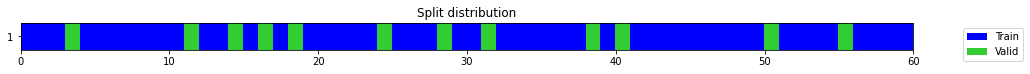

((#48) [58,21,9,45,41,54,56,46,44,53...],
 (#12) [55,38,40,18,16,24,3,28,50,14...])

In [305]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits

In [306]:
X_3d.shape, y.shape, splits

((60, 1, 570),
 (60,),
 ((#48) [58,21,9,45,41,54,56,46,44,53...],
  (#12) [55,38,40,18,16,24,3,28,50,14...]))

In [307]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X_3d, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#60) [(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1))...]

In fastai I've modified TS datasets so that you can pass univariate time series as a 2d or 3d arrays.

In [308]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X_2d, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#60) [(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1))...]

### Pre-split 2d or 3d np.ndarray/ torch.Tensor

If your data is already split into Train and Valid/ Test, you may the use `get_predefined_split` to generate the splits:

In [309]:
ds_name = 'OliveOil' 
X_train, y_train, X_valid, y_valid = get_UCR_data(ds_name, return_split=True)

In [310]:
X, y, splits = combine_split_data([X_train, X_valid], [y_train, y_valid])

In [311]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#60) [(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1))...]

## Pandas dataframe with samples as rows 🐼

### Univariate

In [312]:
ds_name = 'OliveOil'
X, y, _ = get_UCR_data(ds_name, return_split=False)
X = X[:, 0]
y = y.reshape(-1, 1)
data = np.concatenate((X, y), axis=-1)
df = pd.DataFrame(data)
df = df.rename(columns={570: 'target'})
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,target
0,-0.6113753,-0.61058575,-0.60655695,-0.6011323,-0.5943146,-0.5857617,-0.57741904,-0.57017505,-0.56328535,-0.5574073,-0.55306035,-0.54781276,-0.54062283,-0.53238523,-0.5242016,-0.5147812,-0.5047363,-0.4952528,-0.485334,-0.47537318,-0.46403742,-0.45114058,-0.4369889,-0.42175648,-0.4067732,-0.39350414,-0.38244155,-0.37466624,-0.36922652,-0.36666876,-0.3679026,-0.37080258,-0.37362453,-0.37438405,-0.372865,-0.3702442,-0.36807972,-0.3673022,-0.3683349,-0.37162817,...,-0.9286415,-0.9316075,-0.93491876,-0.93783975,-0.94056565,-0.9436097,-0.94698703,-0.9497789,-0.95259786,-0.9553117,-0.9577494,-0.9606554,-0.9618862,-0.9622885,-0.9637895,-0.9654887,-0.96707076,-0.96850574,-0.9692563,-0.97000676,-0.9712196,-0.97347116,-0.97518533,-0.97595084,-0.9767614,-0.9777971,-0.9782804,-0.9781664,-0.9784366,-0.97955334,-0.9803849,-0.98032784,-0.9802198,-0.9806911,-0.98133653,-0.9823362,-0.9832128,-0.98367214,-0.9831198,1
1,-0.61539173,-0.61372936,-0.6092278,-0.6043151,-0.5987679,-0.59050655,-0.5816167,-0.5729264,-0.5653742,-0.5599074,-0.55469084,-0.5493044,-0.5424702,-0.5327998,-0.523466,-0.51446587,-0.5054389,-0.49574763,-0.4846621,-0.4748427,-0.46355754,-0.44917405,-0.43526125,-0.42058876,-0.40537405,-0.39310876,-0.38420993,-0.37710756,-0.37194163,-0.36985323,-0.37061888,-0.37295753,-0.3744918,-0.37498936,-0.37296945,-0.368739,-0.36538446,-0.36521763,-0.3662395,-0.36865857,...,-0.9288288,-0.93108404,-0.9340692,-0.936959,-0.9400484,-0.9434745,-0.9467635,-0.94974566,-0.95251334,-0.9551499,-0.95775074,-0.9599792,-0.96084315,-0.9620884,-0.963724,-0.965154,-0.9665721,-0.96809745,-0.9694619,-0.970454,-0.9713924,-0.9731084,-0.9745027,-0.9758433,-0.9767907,-0.97686815,-0.9778632,-0.9787957,-0.97900724,-0.9792098,-0.97933495,-0.97952265,-0.98003805,-0.9811463,-0.982332,-0.9825703,-0.9826299,-0.9828504,-0.9825495,1
2,-0.61199886,-0.6105003,-0.606374,-0.6004454,-0.5930837,-0.5852453,-0.577118,-0.56882674,-0.56159616,-0.55609345,-0.5514965,-0.5465301,-0.5397196,-0.53149986,-0.5226009,-0.51322824,-0.5040581,-0.49438158,-0.4840943,-0.47418833,-0.46224755,-0.44844177,-0.43458235,-0.41984707,-0.40504324,-0.39165455,-0.38086674,-0.37267384,-0.367484,-0.36535385,-0.36622676,-0.36862504,-0.37185156,-0.3722359,-0.36948904,-0.3671563,-0.364615,-0.36311942,-0.3646865,-0.36879784,...,-0.92803323,-0.9309082,-0.9344952,-0.9374059,-0.94085586,-0.94380534,-0.94685304,-0.9502494,-0.95351464,-0.9563449,-0.95894575,-0.9609151,-0.9613202,-0.9621127,-0.9638645,-0.96565205,-0.96663815,-0.9678001,-0.9694208,-0.97115767,-0.9721468,-0.9731627,-0.9749473,-0.97696716,-0.97740513,-0.9773157,-0.97770303,-0.9780665,-0.97877556,-0.9795144,-0.9796634,-0.9799643,-0.9805631,-0.9813258,-0.9827439,-0.9831074,-0.9830329,-0.98395646,-0.98385817,1
3,-0.62278444,-0.6222215,-0.6190489,-0.6132514,-0.6058886,-0.59750843,-0.589047,-0.58069694,-0.57282245,-0.566727,-0.5621004,-0.5575762,-0.5509329,-0.5432631,-0.5359064,-0.5272794,-0.5178035,-0.50788516,-0.4973467,-0.48689255,-0.47539392,-0.46113798,-0.44533786,-0.42968524,-0.41457745,-0.40165198,-0.39022556,-0.38090926,-0.37547597,-0.37315518,-0.37455186,-0.37754694,-0.37892258,-0.37832958,-0.376963,-0.37452176,-0.37186083,-0.3709036,-0.3719722,-0.3761081,...,-0.92008495,-0.92249906,-0.9256928,-0.9295127,-0.9330766,-0.93493086,-0.9376039,-0.9410324,-0.94345856,-0.9463001,-0.9494035,-0.9518598,-0.9524046,-0.9533498,-0.954295,-0.95524013,-0.9567693,-0.95837367,-0.9598818,-0.9607607,-0.9618594,-0.96385515,-0.96569735,-0.967687,-0.9692914,-0.96823484,-0.96799403,-0.9683733,-0.96819574,-0.9688188,-0.96990246,-0.97058576,-0.9707182,-0.97119683,-0.9722684,-0.9726537,-0.9728614,-0.97367114,-0.9736139,1
4,-0.62179345,-0.62127197,-0.61729795,-0.61207414,-0.6054717,-0.5976075,-0.5891649,-0

In [313]:
X, y = df2xy(df, target_col='target')
test_eq(X.shape, (60, 1, 570))
test_eq(y.shape, (60, ))

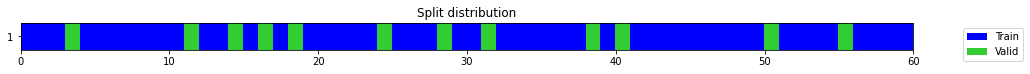

((#48) [58,21,9,45,41,54,56,46,44,53...],
 (#12) [55,38,40,18,16,24,3,28,50,14...])

In [314]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits

In [315]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#60) [(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(0)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1)),(TSTensor(vars:1, len:570), TensorCategory(1))...]

### Multivariate

In [316]:
ds_name = 'OliveOil'
X, y, _ = get_UCR_data(ds_name, return_split=False)
X = X[:, 0]
y = y.reshape(-1, 1)
data = np.concatenate((X, y), axis=-1)
df = pd.DataFrame(data).astype(float)
df = df.rename(columns={570: 'target'})
df1 = pd.concat([df, df + 10, df + 100], axis=0).reset_index(drop=False)
df2 = pd.DataFrame(np.array([1] * 60 + [2] * 60 + [3] * 60), columns=['feature'])
df = pd.merge(df2, df1, left_index=True, right_index=True)
df

,feature,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,target
0,1,0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,-0.557407,-0.553060,-0.547813,-0.540623,-0.532385,-0.524202,-0.514781,-0.504736,-0.495253,-0.485334,-0.475373,-0.464037,-0.451141,-0.436989,-0.421756,-0.406773,-0.393504,-0.382442,-0.374666,-0.369227,-0.366669,-0.367903,-0.370803,-0.373625,-0.374384,-0.372865,-0.370244,-0.368080,-0.367302,...,-0.928642,-0.931608,-0.934919,-0.937840,-0.940566,-0.943610,-0.946987,-0.949779,-0.952598,-0.955312,-0.957749,-0.960655,-0.961886,-0.962288,-0.963789,-0.965489,-0.967071,-0.968506,-0.969256,-0.970007,-0.971220,-0.973471,-0.975185,-0.975951,-0.976761,-0.977797,-0.978280,-0.978166,-0.978437,-0.979553,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120,1.0
1,1,1,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,-0.559907,-0.554691,-0.549304,-0.542470,-0.532800,-0.523466,-0.514466,-0.505439,-0.495748,-0.484662,-0.474843,-0.463558,-0.449174,-0.435261,-0.420589,-0.405374,-0.393109,-0.384210,-0.377108,-0.371942,-0.369853,-0.370619,-0.372958,-0.374492,-0.374989,-0.372969,-0.368739,-0.365384,-0.365218,...,-0.928829,-0.931084,-0.934069,-0.936959,-0.940048,-0.943474,-0.946763,-0.949746,-0.952513,-0.955150,-0.957751,-0.959979,-0.960843,-0.962088,-0.963724,-0.965154,-0.966572,-0.968097,-0.969462,-0.970454,-0.971392,-0.973108,-0.974503,-0.975843,-0.976791,-0.976868,-0.977863,-0.978796,-0.979007,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549,1.0
2,1,2,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,-0.556093,-0.551496,-0.546530,-0.539720,-0.531500,-0.522601,-0.513228,-0.504058,-0.494382,-0.484094,-0.474188,-0.462248,-0.448442,-0.434582,-0.419847,-0.405043,-0.391655,-0.380867,-0.372674,-0.367484,-0.365354,-0.366227,-0.368625,-0.371852,-0.372236,-0.369489,-0.367156,-0.364615,-0.363119,...,-0.928033,-0.930908,-0.934495,-0.937406,-0.940856,-0.943805,-0.946853,-0.950249,-0.953515,-0.956345,-0.958946,-0.960915,-0.961320,-0.962113,-0.963865,-0.965652,-0.966638,-0.967800,-0.969421,-0.971158,-0.972147,-0.973163,-0.974947,-0.976967,-0.977405,-0.977316,-0.977703,-0.978066,-0.978776,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858,1.0
3,1,3,-0.622784,-0.622221,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,-0.566727,-0.562100,-0.557576,-0.550933,-0.543263,-0.535906,-0.527279,-0.517803,-0.507885,-0.497347,-0.486893,-0.475394,-0.461138,-0.445338,-0.429685,-0.414577,-0.401652,-0.390226,-0.380909,-0.375476,-0.373155,-0.374552,-0.377547,-0.378923,-0.378330,-0.376963,-0.374522,-0.371861,-0.370904,...,-0.920085,-0.922499,-0.925693,-0.929513,-0.933077,-0.934931,-0.937604,-0.941032,-0.943459,-0.946300,-0.949403,-0.951860,-0.952405,-0.953350,-0.954295,-0.955240,-0.956769,-0.958374,-0.959882,-0.960761,-0.961859,-0.963855,-0.965697,-0.967687,-0.969291,-0.968235,-0.967994,-0.968373,-0.968196,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614,1.0
4,1,4,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,-0.568411,-0.563097,-0.557268,-0.549937,-0.542037,-0.534020,-0.524753,-0.514632,-0.504550,-0.494594,-0.483790,-0.471930,-0.459328,-0.444664,-0.428863,-0.413821,-0.400104,-0.390837,-0.383959,-0.377353,-0.375318,-0.376523,-0.378876,-0.380237,-0.379206,-0.376988,-0.374216,-0.371731,-0.370334,...,-0.928263,-0.931925,-0.935294,-0.937631,-0.939870,-0.942631,-0.945753,-0.948825,-0.951819,-0.954742,-0.957139,-0.959821,-0.960999,-0.961512,-0.962477,-0.964002,-0.965528,-0.966969,-0.96837

In [317]:
X, y = df2xy(df, sample_col='index', feat_col='feature', target_col='target', data_cols=None)
test_eq(X.shape, (60, 3, 570))
test_eq(y.shape, (60, ))

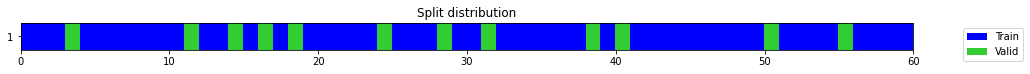

((#48) [58,21,9,45,41,54,56,46,44,53...],
 (#12) [55,38,40,18,16,24,3,28,50,14...])

In [318]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits

In [319]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#60) [(TSTensor(vars:3, len:570), TensorCategory(0)),(TSTensor(vars:3, len:570), TensorCategory(0)),(TSTensor(vars:3, len:570), TensorCategory(0)),(TSTensor(vars:3, len:570), TensorCategory(0)),(TSTensor(vars:3, len:570), TensorCategory(0)),(TSTensor(vars:3, len:570), TensorCategory(1)),(TSTensor(vars:3, len:570), TensorCategory(1)),(TSTensor(vars:3, len:570), TensorCategory(1)),(TSTensor(vars:3, len:570), TensorCategory(1)),(TSTensor(vars:3, len:570), TensorCategory(1))...]

## Single, long time series 🤥

Sometimes, instead of having the data already split into samples, you only have a single (univariate or multivariate) time series that you need to split. 
The recommended way to do this is to use a sliding window. In `timeseriesAI`there is a function called `SlidingWindow`that performs this task in a flexible way.

This function applies a sliding window to a 1d or 2d input (np.ndarray, torch.Tensor or pd.DataFrame). 
   
* Args:
    * window_length   = length of lookback window
    * stride          = n datapoints the window is moved ahead along the sequence. Default: 1. If None, stride=window_length (no overlap)
    * horizon         = number of future datapoints to predict. 0 for last step in the selected window. > 0 for future steps. List for several steps.
    * get_x          = indices of columns that contain the independent variable (xs). If get_x=None, all data will be used as x
    * get_y          = indices of columns that contain the target (ys). If y_idx is None, no y will be returned
    * seq_first       = True if input shape (seq_len, n_vars), False if input shape (n_vars, seq_len)
    * random_start    = determines the step where the first window is applied: 0 (default), a given step (int), or random within the 1st stride (None). 

* Input:
    * shape: (seq_len, ) or (seq_len, n_vars) if seq_first=True else (n_vars, seq_len)

### Univariate

You may use it just without a target

In [320]:
window_length = 5
t = np.arange(100)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length)(t)
test_eq(X.shape, ((95, 1, 5)))

input shape: (100,)


If the target is the next step in the univariate time series set `horizon=1`:

In [321]:
window_length = 5
horizon = 1

t = np.arange(100)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length, horizon=horizon)(t)
test_eq(X.shape, ((95, 1, 5)))
test_eq(y.shape, ((95,)))

input shape: (100,)


Horizon may be > 1 to select multiple steps in the future:

In [322]:
window_length = 5
horizon = 2

t = np.arange(100)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length, horizon=horizon)(t)
test_eq(X.shape, ((94, 1, 5)))
test_eq(y.shape, ((94, 2)))

input shape: (100,)


To have non-overlapping samples, we need to set `stride=None`:

In [323]:
window_length = 5
stride = None
horizon = 1
t = np.arange(100)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length, stride=stride, horizon=horizon)(t)
test_eq(X.shape, ((19, 1, 5)))
test_eq(y.shape, ((19, )))

input shape: (100,)


In [324]:
window_length = 5
stride = 3
horizon = 1
t = np.arange(100)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length, stride=stride, horizon=horizon)(t)
test_eq(X.shape, ((32, 1, 5)))
test_eq(y.shape, ((32, )))

input shape: (100,)


We can also decide where to start the sliding window using `start`: 

In [325]:
window_length = 5
stride = None
horizon = 1
t = np.arange(100)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length, stride=stride, start=20, horizon=horizon)(t)
test_eq(X.shape, ((15, 1, 5)))
test_eq(y.shape, ((15, )))

input shape: (100,)


If the time series is of shape (1, seq_len) we need to set `seq_first=False`

In [326]:
window_length = 5
stride = 3
horizon = 1
t = np.arange(100).reshape(1, -1)
print('input shape:', t.shape)
X, y = SlidingWindow(window_length, stride=stride, horizon=horizon, seq_first=False)(t)
test_eq(X.shape, ((32, 1, 5)))
test_eq(y.shape, ((32, )))

input shape: (1, 100)


Your univariate time series may be in a pandas DataFrame:

In [327]:
window_length = 5
stride = None
horizon=1

t = np.arange(20)
df = pd.DataFrame(t, columns=['var'])
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, stride=stride, horizon=horizon)(df)
test_eq(X.shape, ((3, 1, 5)))
test_eq(y.shape, ((3, )))

input shape: (20, 1)


,var
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [328]:
window_length = 5
stride = None
horizon=1

t = np.arange(20)
df = pd.DataFrame(t, columns=['var']).T
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, stride=stride, horizon=horizon, seq_first=False)(df)
test_eq(X.shape, ((3, 1, 5)))
test_eq(y.shape, ((3, )))

input shape: (1, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
var,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19


### Multivariate

When using multivariate data, all parameters shown before work in the same way, but you always need to indicate how to get the X data and the y data (as there are multiple features). To do that, we'll use get_x and get_y. 

By default get_x is set to None, which means that all features will be used.
By default get_y is set to None, which means that all features will be used as long as horizon > 0 (to avoid leakage).

If you get the time series in a np.ndarray or a torch.Tensor, you should use integers, a list or slice as get_x/ get_y.

(1000, 3)


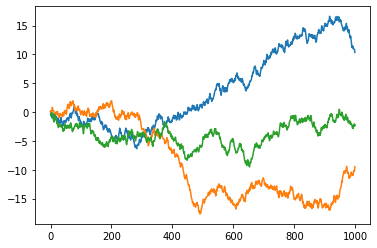

In [329]:
window_length = 5
stride = None
n_vars = 3

t = (np.random.rand(1000, n_vars) - .5).cumsum(0)
print(t.shape)
plt.plot(t)
plt.show()
X, y = SlidingWindow(window_length, stride=stride, get_x=[0,1], get_y=2)(t)
test_eq(X.shape, ((199, 2, 5)))
test_eq(y.shape, ((199, )))

In [330]:
window_length = 5
n_vars = 3

t = (torch.stack(n_vars * [torch.arange(10)]).T * tensor([1, 10, 100]))
df = pd.DataFrame(t, columns=[f'var_{i}' for i in range(n_vars)])
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length)(df)
test_eq(X.shape, ((5, 3, 5)))
test_eq(y.shape, ((5, 3)))

input shape: (10, 3)


,var_0,var_1,var_2
0,0,0,0
1,1,10,100
2,2,20,200
3,3,30,300
4,4,40,400
5,5,50,500
6,6,60,600
7,7,70,700
8,8,80,800
9,9,90,900


In [331]:
window_length = 5
n_vars = 3
horizon = 1

t = (torch.stack(n_vars * [torch.arange(10)]).T * tensor([1, 10, 100]))
df = pd.DataFrame(t, columns=[f'var_{i}' for i in range(n_vars)])
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, horizon=horizon)(df)
test_eq(X.shape, ((5, 3, 5)))
test_eq(y.shape, ((5, 3)))

input shape: (10, 3)


,var_0,var_1,var_2
0,0,0,0
1,1,10,100
2,2,20,200
3,3,30,300
4,4,40,400
5,5,50,500
6,6,60,600
7,7,70,700
8,8,80,800
9,9,90,900


You may also get the target from a different column: 

In [332]:
window_length = 5
n_vars = 3

t = (torch.stack(n_vars * [torch.arange(10)]).T * tensor([1, 10, 100]))
columns=[f'var_{i}' for i in range(n_vars-1)]+['target']
df = pd.DataFrame(t, columns=columns)
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, get_x=columns[:-1], get_y='target')(df)
test_eq(X.shape, ((5, 2, 5)))
test_eq(y.shape, ((5, )))

input shape: (10, 3)


,var_0,var_1,target
0,0,0,0
1,1,10,100
2,2,20,200
3,3,30,300
4,4,40,400
5,5,50,500
6,6,60,600
7,7,70,700
8,8,80,800
9,9,90,900


In [333]:
window_length = 5
n_vars = 5
horizon = 1

t = (torch.stack(n_vars * [torch.arange(10)]).T * tensor([10**i for i in range(n_vars)]))
columns=[f'var_{i}' for i in range(n_vars-1)]+['target']
df = pd.DataFrame(t, columns=columns)
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, horizon=horizon, get_x=columns[:-1], get_y='target')(df)
test_eq(X.shape, ((5, 4, 5)))
test_eq(y.shape, ((5, )))

input shape: (10, 5)


,var_0,var_1,var_2,var_3,target
0,0,0,0,0,0
1,1,10,100,1000,10000
2,2,20,200,2000,20000
3,3,30,300,3000,30000
4,4,40,400,4000,40000
5,5,50,500,5000,50000
6,6,60,600,6000,60000
7,7,70,700,7000,70000
8,8,80,800,8000,80000
9,9,90,900,9000,90000


input shape: (100, 5)


,var_0,var_1,var_2,var_3,target
0,-0.146691,0.488185,0.447645,-0.216099,1.0
1,-0.332389,0.900175,0.759071,-0.492314,1.0
2,-0.113022,1.182236,1.173078,-0.227708,4.0
3,-0.458110,1.390164,1.623428,-0.254796,1.0
4,-0.489114,1.428047,2.091996,-0.380881,3.0
...,...,...,...,...,...
95,1.540549,2.051492,2.922141,2.618461,2.0
96,1.303017,1.655995,3.166342,2.719738,3.0
97,1.015063,1.205323,3.157279,2.590118,0.0
98,0.795419,0.998723,3.159764,2.379689,4.0


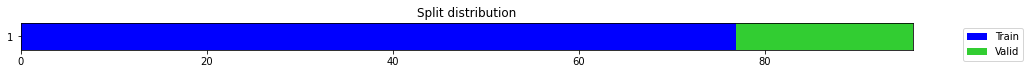

(#96) [(TSTensor(vars:4, len:4), TensorCategory(3)),(TSTensor(vars:4, len:4), TensorCategory(4)),(TSTensor(vars:4, len:4), TensorCategory(3)),(TSTensor(vars:4, len:4), TensorCategory(3)),(TSTensor(vars:4, len:4), TensorCategory(6)),(TSTensor(vars:4, len:4), TensorCategory(5)),(TSTensor(vars:4, len:4), TensorCategory(3)),(TSTensor(vars:4, len:4), TensorCategory(3)),(TSTensor(vars:4, len:4), TensorCategory(2)),(TSTensor(vars:4, len:4), TensorCategory(6))...]

In [334]:
window_length = 4
n_vars = 5
seq_len = 100
horizon = 1

t1 = (np.random.rand(seq_len, n_vars-1) - .5).cumsum(0)
t2 = np.random.randint(0, 10, (seq_len,1))
t = np.concatenate((t1, t2), axis=-1)
columns=[f'var_{i}' for i in range(n_vars-1)]+['target']
df = pd.DataFrame(t, columns=columns)
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, horizon=horizon, get_x=columns[:-1], get_y='target')(df)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=False)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

In [335]:
dsets[0][0].data, dsets[0][1].data

(tensor([[-0.1467, -0.3324, -0.1130, -0.4581],
         [ 0.4882,  0.9002,  1.1822,  1.3902],
         [ 0.4476,  0.7591,  1.1731,  1.6234],
         [-0.2161, -0.4923, -0.2277, -0.2548]]), TensorCategory(3))

input shape: (5, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
var_0,-0.406828,-0.714151,-0.832278,-0.412041,-0.593738,-0.453709,-0.636850,-1.044314,-0.964718,-1.027831,-1.055613,-1.346424,-1.031040,-0.638912,-0.489590,-0.029421,-0.319604,0.164637,-0.191944,0.276185,-0.197259,0.234542,-0.020996,-0.280035,-0.530785,-0.427719,-0.783245,-1.126110,-1.104562,-0.993399,-0.935510,-0.735733,-0.954067,-0.700842,-0.724835,-0.506188,-0.294146,-0.502949,-0.361727,-0.144354,...,0.544595,0.158528,-0.042842,-0.008558,-0.300137,0.057720,0.324637,0.337470,0.033030,-0.037212,-0.411559,-0.057162,-0.183621,0.209160,0.472780,0.825917,0.632802,0.419780,0.745139,0.808560,0.815245,0.520812,0.737814,1.071762,1.024945,0.562418,0.777425,0.744420,0.360114,0.849415,0.863157,0.903028,0.437448,0.249722,0.363601,-0.097916,-0.413788,-0.870447,-0.790112,-0.963422
var_1,0.289711,0.117024,0.607560,1.075761,0.659518,0.485298,0.922675,0.719333,0.562725,0.814794,0.391086,0.372003,0.480450,0.980273,1.194814,0.816156,1.073597,1.354563,1.299134,1.517705,1.530564,1.360733,1.061292,1.004815,1.283690,1.767025,1.511457,1.376733,1.036716,1.047994,0.614588,0.487226,0.450360,0.054321,0.438040,0.269334,0.079807,0.445301,0.566316,0.335584,...,-0.381864,-0.198405,-0.498632,-0.853639,-0.988640,-0.595025,-0.871049,-0.688098,-0.442397,-0.722607,-1.188019,-1.250007,-1.531861,-1.749529,-1.588276,-2.009865,-1.698888,-1.377991,-1.334318,-1.756615,-1.549651,-1.212883,-1.353130,-1.775444,-2.143393,-2.276565,-2.143731,-2.182378,-2.516833,-2.473928,-2.753413,-2.713923,-2.493351,-2.891069,-2.557255,-3.007513,-3.462407,-2.999881,-3.085219,-2.714370
var_2,0.310060,0.070685,-0.033832,-0.202385,-0.577572,-0.100538,0.398522,0.501695,0.244375,0.517338,0.931803,1.164556,1.356649,1.485663,1.050835,0.585937,0.934413,0.620429,0.429876,0.010973,-0.366054,-0.294026,0.074616,-0.017274,0.150771,-0.193714,-0.516270,-0.842625,-1.107381,-1.536128,-1.214508,-1.338444,-1.547274,-1.071213,-0.583555,-0.899092,-0.752640,-0.945233,-1.305961,-1.720957,...,-0.938509,-0.881609,-1.150072,-0.843503,-0.785028,-1.193390,-0.755260,-1.033307,-0.907202,-0.532207,-0.278750,-0.460071,-0.587061,-1.067974,-1.329081,-1.590704,-2.034688,-1.981148,-2.433119,-2.831739,-3.173817,-3.668556,-3.596600,-3.219678,-3.389592,-3.307385,-3.221721,-3.438491,-3.680031,-4.149742,-3.763122,-4.091638,-3.759546,-4.242915,-4.684548,-4.682731,-4.708167,-4.313758,-4.425316,-3.959073
var_3,0.491998,0.674454,1.045189,1.199203,1.172394,0.730344,0.984604,1.050294,0.774244,0.440379,0.490714,0.853144,0.928495,0.495190,0.989387,1.364473,1.736014,2.110231,2.181648,2.037925,1.538250,1.875549,1.449618,1.504677,1.329430,1.424145,1.417198,1.838257,1.585830,1.548815,1.686342,1.649138,1.460482,1.917221,2.220787,2.667935,2.953497,3.384431,3.556117,3.643132,...,6.023246,6.329206,6.706623,6.613931,6.634851,6.314934,6.509724,6.990589,6.710552,6.866822,6.964814,6.494953,6.045491,6.067864,6.069391,5.954015,6.155116,6.247277,5.824786,5.825569,5.685128,5.459100,5.685918,5.641448,5.326929,5.324174,5.033355,4.937475,5.209515,5.408503,5.677769,5.302578,5.252217,5.009705,5.018335,5.363929,5.749010,5.907943,5.656274,5.599850
target,2.000000,4.000000,2.000000,5.000000,6.000000,5.000000,8.000000,1.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,1.000000,8.000000,3.000000,8.000000,6.000000,5.000000,8.000000,6.000000,6.000000,9.000000,7.000000,3.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,7.000000,8.000000,3.000000,1.000000,9.000000,0.000000,...,3.000000,2.000000,4.000000,2.000000,5.000000,0.000000,2.000000,8.000000,2.000000,6.000000,4.000000,9.000000,4.000000,6.000000,7.000000,5.000000,4.000000,0.000000,8.000000,1.000000,3.000000,6.000000,0.000000,2.000000,4.000000,9.000000,7.000000,2.000000,4.000000,1.000000,7.000000,9.000000,8.000000,2.000000,8.000000,6.000000

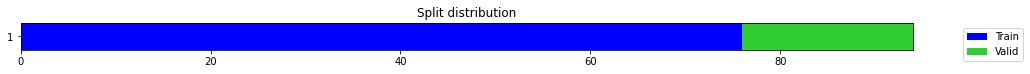

(#94) [(TSTensor(vars:4, len:4), TensorCategory(8)),(TSTensor(vars:4, len:4), TensorCategory(1)),(TSTensor(vars:4, len:4), TensorCategory(3)),(TSTensor(vars:4, len:4), TensorCategory(1)),(TSTensor(vars:4, len:4), TensorCategory(2)),(TSTensor(vars:4, len:4), TensorCategory(1)),(TSTensor(vars:4, len:4), TensorCategory(8)),(TSTensor(vars:4, len:4), TensorCategory(2)),(TSTensor(vars:4, len:4), TensorCategory(1)),(TSTensor(vars:4, len:4), TensorCategory(8))...]

In [336]:
window_length = 4
start = 3
n_vars = 5
seq_len = 100
horizon = 0

t1 = (np.random.rand(seq_len, n_vars-1) - .5).cumsum(0)
t2 = np.random.randint(0, 10, (seq_len,1))
t = np.concatenate((t1, t2), axis=-1)
columns=[f'var_{i}' for i in range(n_vars-1)]+['target']
df = pd.DataFrame(t, columns=columns).T
print('input shape:', df.shape)
display(df)
X, y = SlidingWindow(window_length, start=start, horizon=horizon, get_x=columns[:-1], get_y='target', seq_first=False)(df)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=False)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

In [337]:
dsets[0][0].data, dsets[0][1].data

(tensor([[-0.4120, -0.5937, -0.4537, -0.6368],
         [ 1.0758,  0.6595,  0.4853,  0.9227],
         [-0.2024, -0.5776, -0.1005,  0.3985],
         [ 1.1992,  1.1724,  0.7303,  0.9846]]), TensorCategory(8))

## End-to-end example 🎬

### Data split by sample

This is a example using real data where the dataframe already the data split by sample. Let's first simulate how you could get the pandas df.

In this case, you only need to convert the df format to X and y using `df2xy`as we have seen before.

In [338]:
ds_name = 'NATOPS' 
X, y, splits = get_UCR_data(ds_name, return_split=False)
data = np.concatenate((np.arange(len(X)).repeat(X.shape[1]).reshape(-1,1), np.tile(np.arange(X.shape[1]), len(X)).reshape(-1,1)), axis=1)
df1 = pd.DataFrame(data, columns=['sample', 'feature'])
df2 = pd.DataFrame(X.reshape(-1, 51))
df3 = pd.DataFrame(np.tile(y, X.shape[1]), columns=['target'])
df = df1.merge(df2, left_index=True, right_index=True)
df = df.merge(df3, left_index=True, right_index=True)
df

,sample,feature,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,target
0,0,0,-0.372758,-0.367844,-0.378445,-0.386751,-0.417101,-0.447204,-0.423585,-0.318506,-0.144364,0.075895,0.347454,0.561359,0.849287,0.797611,0.441814,0.254091,0.234146,0.232438,0.523842,0.372282,0.297769,0.062438,-0.160582,-0.633307,-1.113923,-1.545462,-1.867234,-1.962210,-2.042082,-2.133169,-2.104933,-2.052543,-2.088645,-2.058607,-2.067922,-1.973175,-1.654191,-1.494491,-1.247257,-1.063626,-0.832244,-0.563308,-0.477529,-0.487402,-0.485995,-0.480247,-0.496073,-0.491603,-0.537007,-0.475939,-0.479505,4.0
1,0,1,-1.821679,-1.841987,-1.821358,-1.845643,-1.941721,-2.005778,-1.817611,-1.560247,-1.225895,-0.853063,-0.419435,0.009286,0.381121,0.272432,0.066764,-0.017016,-0.034722,-0.027134,-0.340397,0.099757,0.131993,0.329044,0.595222,0.624985,0.616613,0.456410,0.395317,0.288116,0.250682,0.235802,0.197454,0.166000,0.137392,0.052128,-0.123506,-0.418470,-0.852231,-1.201431,-1.436095,-1.704426,-1.852032,-1.833314,-1.843810,-1.830620,-1.820712,-1.781465,-1.804775,-1.799706,-1.751323,-1.772353,-1.761632,3.0
2,0,2,-0.846321,-0.846325,-0.839571,-0.848031,-0.885500,-1.002093,-1.227122,-1.452898,-1.603039,-1.678848,-1.688274,-1.356675,-0.699367,-0.378241,-0.417872,-0.425954,-0.401918,-0.376071,-0.438593,-0.250388,-0.452534,-0.685466,-0.891882,-1.170822,-1.417568,-1.532446,-1.325571,-1.148472,-0.975525,-0.824918,-0.704670,-0.680691,-0.639966,-0.653525,-0.677719,-0.700480,-0.803960,-0.756572,-0.739488,-0.673516,-0.675284,-0.734147,-0.737160,-0.750605,-0.727674,-0.726221,-0.749053,-0.776479,-0.603740,-0.763048,-0.793202,3.0
3,0,3,0.465208,0.467033,0.471135,0.506153,0.611207,0.697417,0.721512,0.652092,0.452124,0.202564,-0.063753,-0.301600,-0.284377,-0.100933,-0.581304,-0.639331,-0.643672,-0.646670,-0.651358,-0.645455,-0.782841,-0.493971,0.084138,0.342128,0.946373,1.560078,1.935687,1.950222,2.131079,2.126015,2.053882,1.990205,2.039243,2.049479,2.079578,2.130218,1.959991,1.796142,1.533115,1.295336,1.007058,0.661930,0.510333,0.412795,0.412242,0.455973,0.446786,0.425194,0.434855,0.468405,0.460464,4.0
4,0,4,-2.015072,-2.007557,-2.010042,-2.032552,-1.953282,-1.861078,-1.699443,-1.253402,-0.626680,-0.216944,0.166592,0.434528,0.530182,0.141329,-0.670784,-0.546166,-0.515768,-0.511740,-0.509378,-0.555969,-0.532075,-0.054251,0.505936,0.605833,0.625232,0.556590,0.439711,0.342896,0.369876,0.367179,0.272491,0.213265,0.148868,0.031957,-0.160838,-0.478980,-0.982751,-1.322028,-1.538583,-1.801356,-1.950689,-1.978446,-1.953984,-2.004474,-1.991646,-1.997254,-1.998531,-1.976082,-1.960404,-2.006394,-1.969680,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,359,19,-1.658398,-1.617639,-1.623446,-1.690049,-1.596608,-1.631068,-1.524069,-1.515474,-1.249811,-0.750405,-0.474013,-0.197236,-0.041972,0.065433,0.174952,0.259837,0.346307,0.524960,0.609059,0.650063,0.547638,0.591836,0.414409,0.344978,0.017541,0.057137,0.089715,0.361771,0.547795,0.575467,0.497051,0.590614,0.563684,0.550441,0.495695,0.449240,0.340146,0.250273,0.021679,-0.332414,-0.638079,-0.939618,-1.195383,-1.413512,-1.810155,-1.614774,-1.684754,-1.659315,-1.705025,-1.678066,-1.641795,6.0
8636,359,20,-0.679048,-0.654021,-0.656639,-0.711966,-0.742536,-0.748806,-0.806330,-0.913220,-0.955816,-0.978653,-0.805290,-0.668659,-0.759316,-0.928167,-1.174089,-1.397615,-1.539834,-1.580997,-1.622937,-1.529194,-1.467256,-1.158529,-0.621209,-0.469503,-0.366582,-0.432349,-0.643596,-0.942087,-1.204617,-1.455218,-1.402750,-1.463065,-1.281403,-1.070488,-0.888179,-0.807410,-0.642349,-0.621054,-0.678858,-0.807743,-0.870315,-0.887390,-0.841650,-0.782175,-0.734422,-0.684311,-0.651485,-0.660619,-0.690759,-0.716252,-0.704824,3.0
8637,359,21,0.499991,0.390842,0.396292,0.395197,0.441420,0.881352,1.140342,

In this case, we can shuffle the data as the individual time series are independent from the rest.

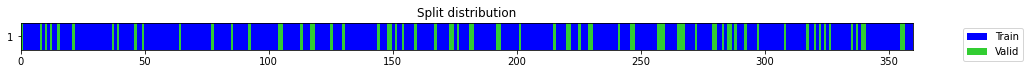

(#360) [(TSTensor(vars:24, len:51), TensorCategory(3)),(TSTensor(vars:24, len:51), TensorCategory(0)),(TSTensor(vars:24, len:51), TensorCategory(0)),(TSTensor(vars:24, len:51), TensorCategory(3)),(TSTensor(vars:24, len:51), TensorCategory(5)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(0)),(TSTensor(vars:24, len:51), TensorCategory(1)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(3))...]

In [339]:
X, y = df2xy(df, sample_col='sample', feat_col='feature', target_col='target', data_cols=df.columns[2:-1])
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dsets

### Single multivariate time series

In this second scenario, we have a single time series, and we'll need to decide how to create the individual samples using the `SlidingWindow`function.

This is how you could get the dataframe, with many columns for each feature, and a target.

In [340]:
ds_name = 'NATOPS' 
X, y, splits = get_UCR_data(ds_name, return_split=False)
data = X.transpose(1,0,2).reshape(X.shape[1], -1)
print(X.shape, data.shape)
df = pd.DataFrame(data).T
df2 = pd.DataFrame(np.repeat(y, X.shape[2]), columns=['target'])
df = df.merge(df2, left_index=True, right_index=True)
df

(360, 24, 51) (24, 18360)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,target
0,-0.372758,-1.821679,-0.846321,0.465208,-2.015072,-0.839242,-0.564097,-0.796225,-0.149604,0.599967,-0.823936,-0.286140,-0.507478,-1.369001,-0.515990,0.577993,-1.534954,-0.673190,-0.536343,-1.626957,-0.594337,0.619205,-1.771773,-0.810086,4.0
1,-0.367844,-1.841987,-0.846325,0.467033,-2.007557,-0.838151,-0.564499,-0.797622,-0.150012,0.597535,-0.822723,-0.285675,-0.489377,-1.382364,-0.537491,0.576627,-1.532795,-0.671919,-0.533816,-1.642514,-0.605328,0.617045,-1.796660,-0.818863,4.0
2,-0.378445,-1.821358,-0.839571,0.471135,-2.010042,-0.832021,-0.563753,-0.795704,-0.151608,0.597007,-0.820954,-0.285412,-0.510865,-1.371936,-0.510966,0.576456,-1.532478,-0.671555,-0.526319,-1.697145,-0.624302,0.624789,-1.738568,-0.788060,4.0
3,-0.386751,-1.845643,-0.848031,0.506153,-2.032552,-0.841696,-0.565008,-0.790238,-0.152350,0.599099,-0.822648,-0.285793,-0.506752,-1.383616,-0.530980,0.579362,-1.535441,-0.672198,-0.554538,-1.644413,-0.602884,0.634100,-1.749744,-0.816695,4.0
4,-0.417101,-1.941721,-0.885500,0.611207,-1.953282,-0.902529,-0.573550,-0.799730,-0.169575,0.606181,-0.826938,-0.290546,-0.529976,-1.560801,-0.658221,0.626759,-1.482552,-0.659393,-0.576196,-1.763092,-0.694843,0.680086,-1.664565,-0.857897,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,-0.845492,-1.919878,-0.583276,0.856647,-1.978063,-0.553987,-0.790264,-0.770808,-0.075527,0.673925,-0.822626,0.058216,-0.879236,-1.428410,-0.402750,0.857950,-1.527194,-0.315056,-0.889773,-1.684754,-0.651485,0.870652,-1.659452,-0.607189,4.0
18356,-0.761116,-1.945017,-0.587023,0.680567,-1.992559,-0.566642,-0.759338,-0.790078,-0.090382,0.630602,-0.856600,0.034010,-0.814410,-1.487098,-0.426398,0.737224,-1.501386,-0.315699,-0.642052,-1.659315,-0.660619,0.754220,-1.727294,-0.618963,4.0
18357,-0.679080,-1.933950,-0.615705,0.574144,-1.986102,-0.572386,-0.741427,-0.793610,-0.100764,0.607822,-0.862768,0.019406,-0.782641,-1.469383,-0.430941,0.659843,-1.503965,-0.324704,-0.609636,-1.705025,-0.690759,0.568415,-1.877402,-0.412571,4.0
18358,-0.670308,-1.916436,-0.634439,0.478221,-2.078024,-0.620835,-0.731334,-0.790556,-0.109856,0.600801,-0.858134,0.009664,-0.766994,-1.464376,-0.438325,0.597387,-1.612530,-0.412526,-0.560203,-1.678066,-0.716252,0.550804,-1.903281,-0.472645,4.0


In this case, you'll need to set the following parameters:
 
* window_length
* stride
* start
* horizon
* get_x
* get_y
* seq_first

You also need to bear in mind that you sould set shuffle=False when using splits since the individual time series are correlated with rest.

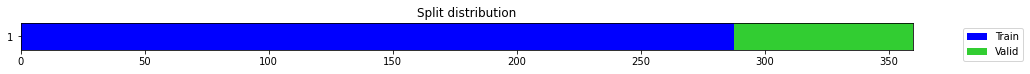

(#360) [(TSTensor(vars:24, len:51), TensorCategory(3)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(3)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(4)),(TSTensor(vars:24, len:51), TensorCategory(0)),(TSTensor(vars:24, len:51), TensorCategory(5)),(TSTensor(vars:24, len:51), TensorCategory(2)),(TSTensor(vars:24, len:51), TensorCategory(1))...]

In [341]:
window_length = X.shape[-1]  # window_length is usually selected based on prior domain knowledge or by trial and error
stride = None                # None for non-overlapping (stride = window_length) (default = 1). This depends on how often you want to predict once the model is trained
start = 0                    # use all data since the first time stamp (default = 0)
get_x = df.columns[:-1]      # Indicates which are the columns that contain the x data.
get_y = 'target'             # In multivariate time series, you must indicate which is/are the y columns
horizon = 0                  # 0 means y is taken from the last time stamp of the time sequence (default = 0)
seq_first = True
                            
X, y = SlidingWindow(window_length, stride=stride, start=start, get_x=get_x,  get_y=get_y, horizon=horizon, seq_first=seq_first)(df)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=False)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dsets

In [342]:
beep()